# Example Stitching Notebook

In [1]:
import os
from sparcstools.parse import parse_phenix
from sparcstools.stitch import generate_stitched

performing stichting with  0.1  overlap.
performing stitching on channel  Alexa488 with id number  0
True
    quantifying alignment error 1000/1000
    aligning edge 12/12


/Users/sophia/Documents/GitHub/SPARCStools/src/sparcstools/_custom_ashlar_funcs.py:93: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/Users/sophia/Documents/GitHub/SPARCStools/src/sparcstools/_custom_ashlar_funcs.py:97: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


need to implement this here. TODO
writing results to one large tif.


  0%|          | 0/3 [00:00<?, ?it/s]

        merging tile 5/9True
        merging tile 9/9

 33%|███▎      | 1/3 [00:02<00:04,  2.37s/it]


        merging tile 1/9True
        merging tile 4/9True
        merging tile 5/9True
        merging tile 7/9True
        merging tile 9/9True


 67%|██████▋   | 2/3 [00:03<00:01,  1.83s/it]


        merging tile 1/9True
        merging tile 4/9True
        merging tile 6/9True
        merging tile 7/9True
        merging tile 9/9

100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

Merging Pipeline completed in  0.2415327986081441 minutes.


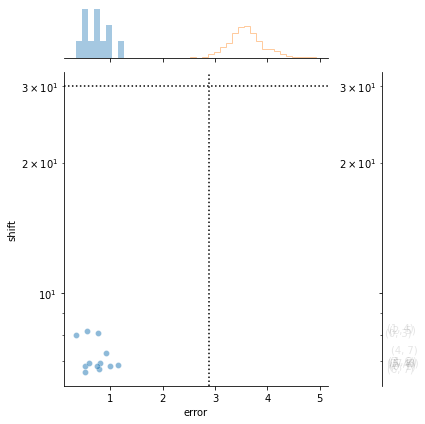

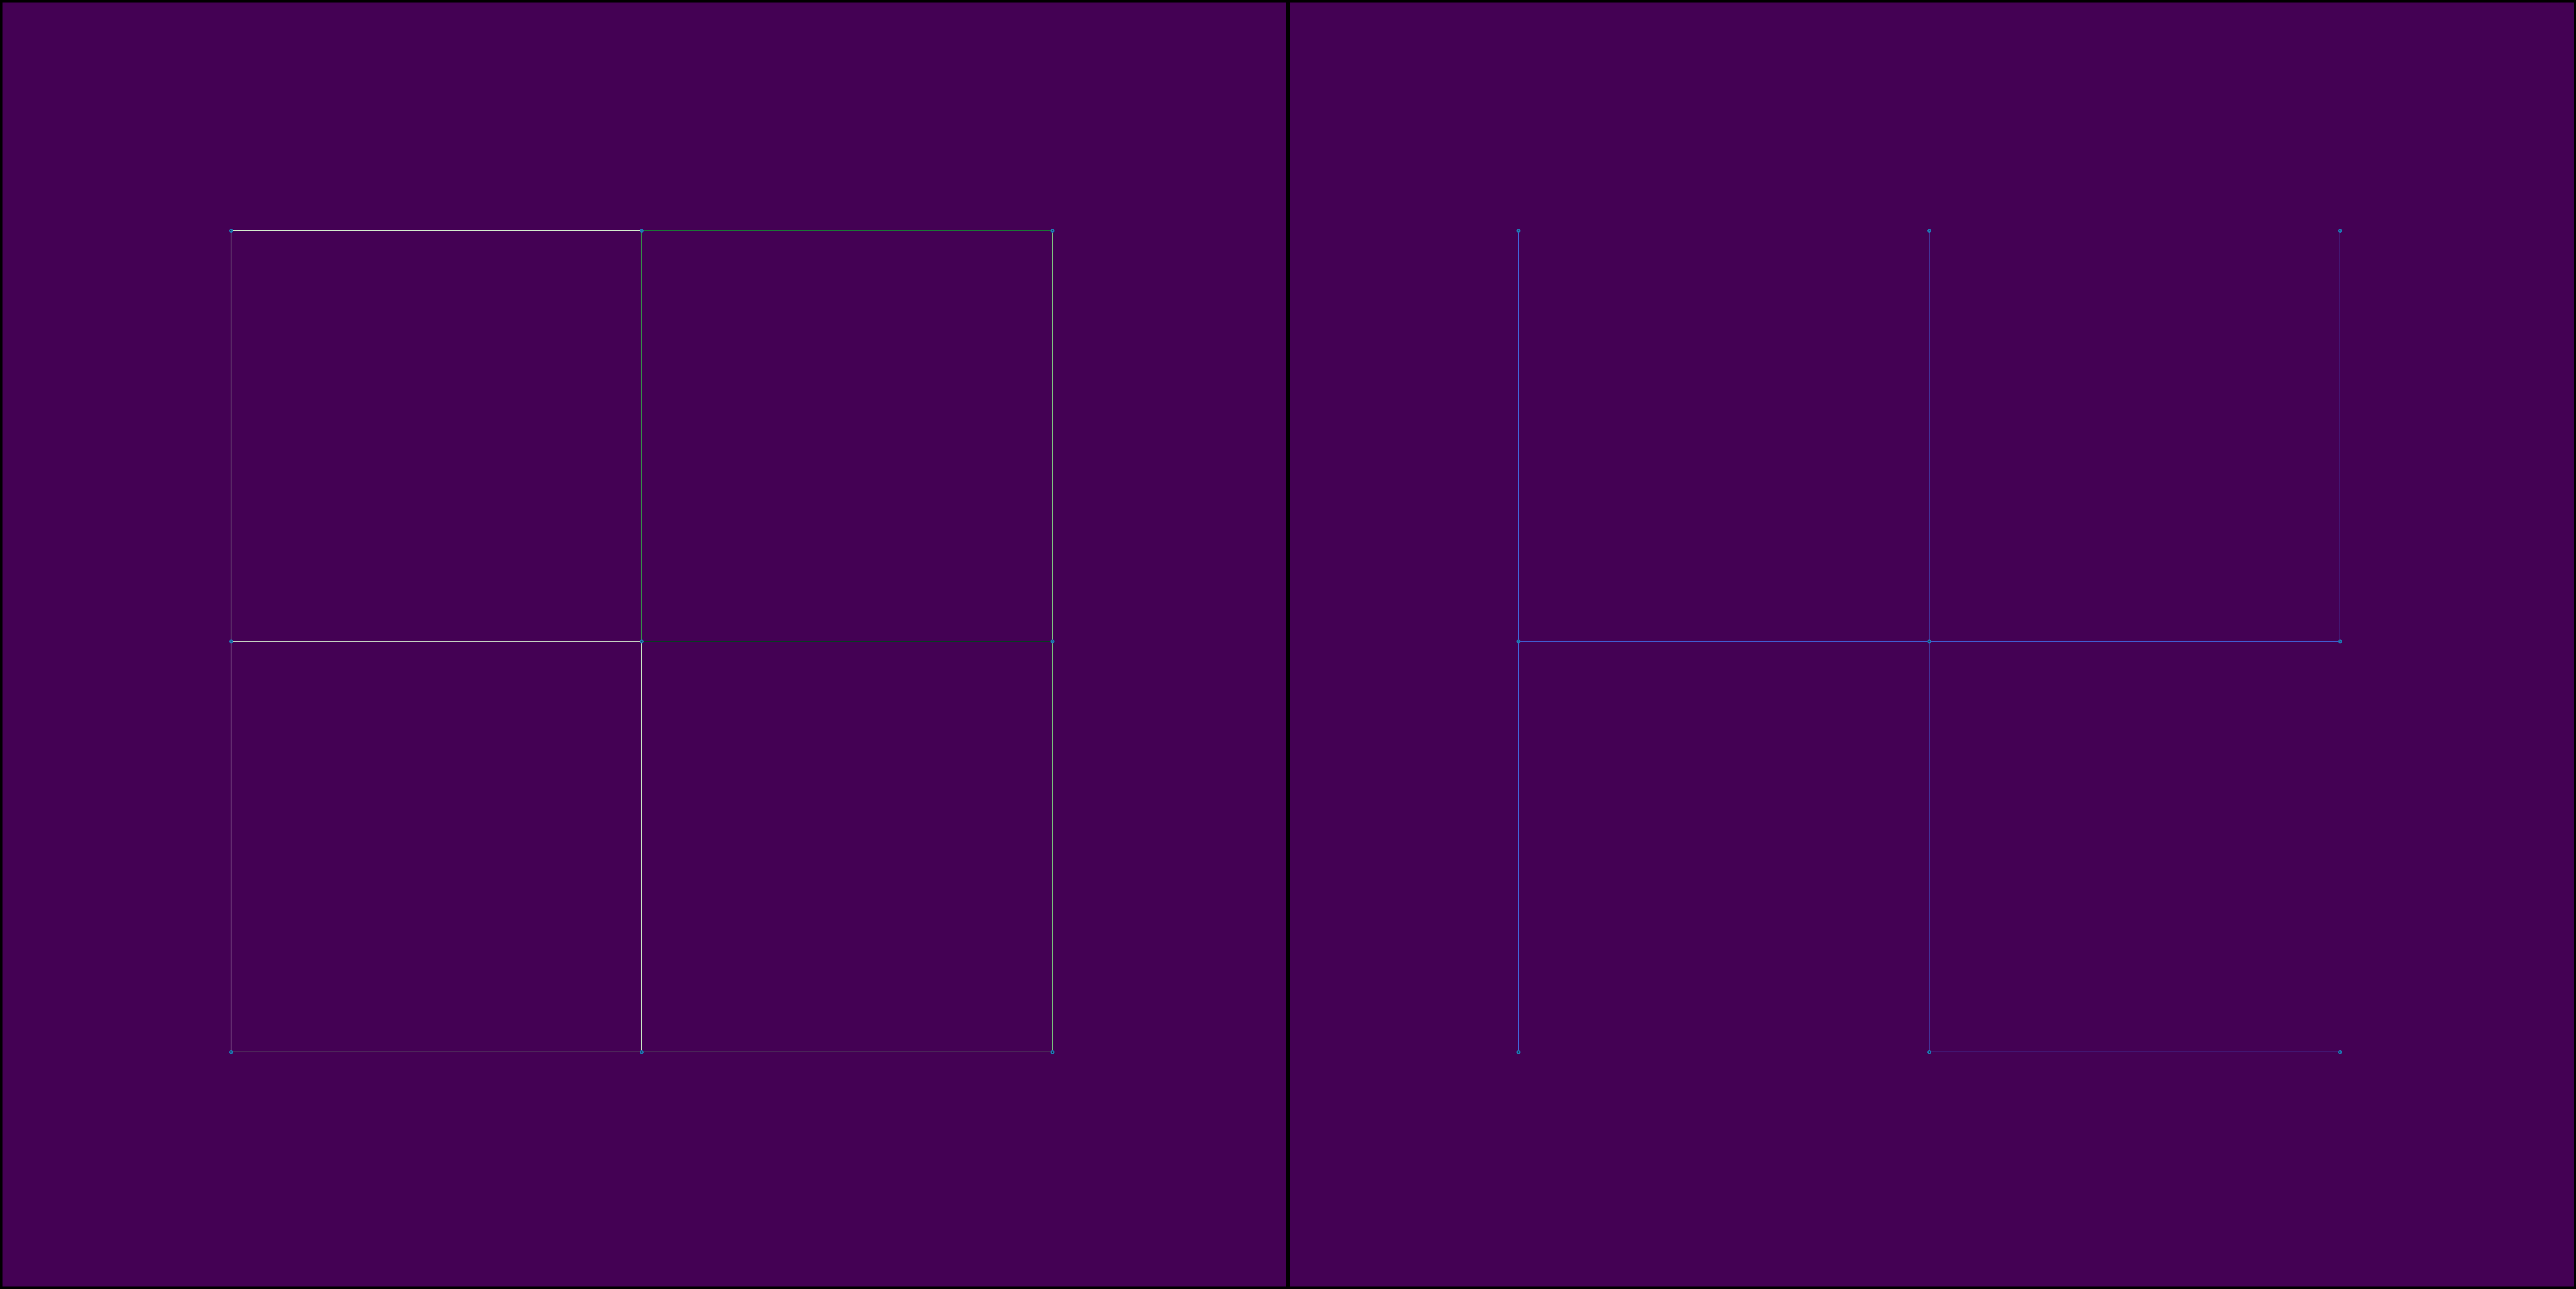

In [3]:
input_dir = os.path.join("../../../test_data/example1/raw_image_tiles/")
slidename = "stitching_test"
outdir = os.path.join("../../../test_data/example1/", slidename)
overlap = 0.1 #adjust in case your data was aquired with another overlap

#define parameters to find correct slide in experiment folder
row = 2
well = 4
zstack_value = 1
timepoint = str(1)

#define on which channel should be stitched
stitching_channel = "Alexa488"
output_filetype = [".tif"] #one of .tif, .ome.tif, .ome.zarr (can pass several if you want to generate all filetypes)

#adjust cropping parameter
crop = {'top':0, 'bottom':0, 'left':0, 'right':0}  #this does no cropping

#create output directory if it does not exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

#define pattern to recognize which slide should be stitched
#remember to adjust the zstack value if you aquired zstacks and want to stitch a speciifc one in the parameters above 

pattern = "Timepoint"+str(timepoint.zfill(3) +"_Row"+ str(row).zfill(2) + "_" + "Well" + str(well).zfill(2) + "_{channel}_"+"zstack"+str(zstack_value).zfill(3)+"_r{row:03}_c{col:03}.tif")
generate_stitched(input_dir, 
                    slidename,
                    pattern,
                    outdir,
                    overlap,
                    crop = crop ,
                    stitching_channel = stitching_channel, 
                    filetype = output_filetype)



## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

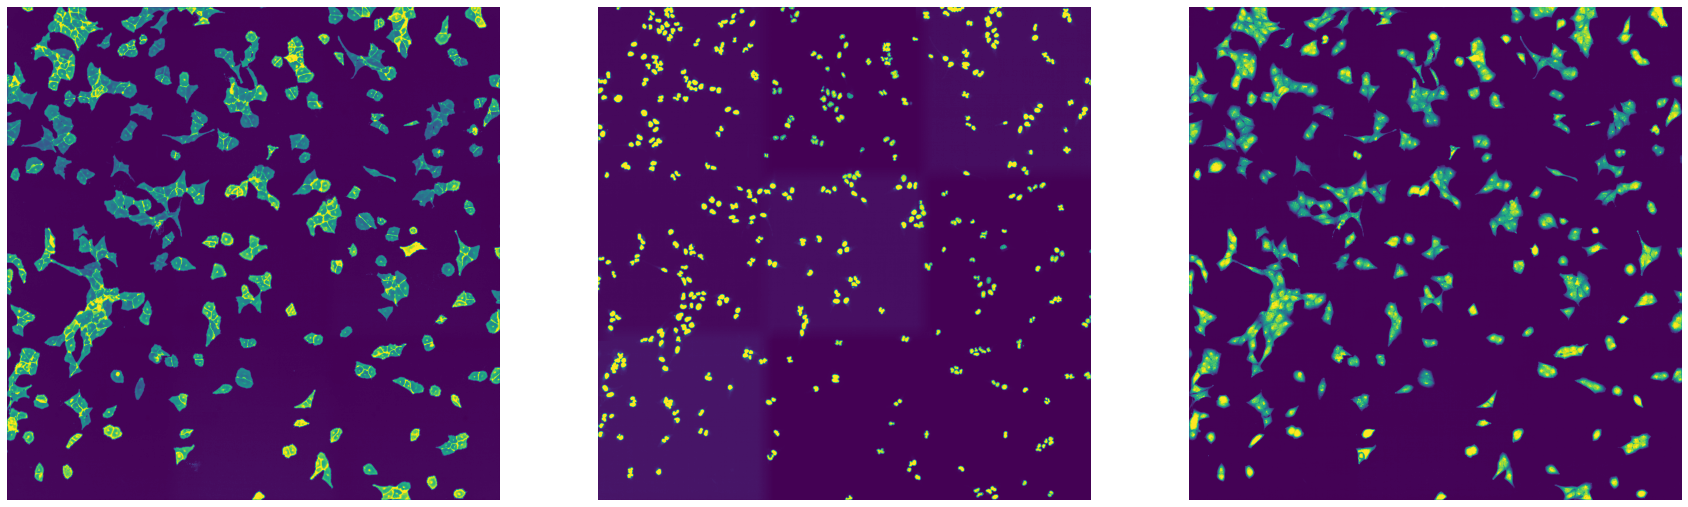

In [14]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")